In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [26]:
ages = data['age']
print("Vector of ages:", ages[:5])
smoker_factor = data['smoker'].astype('category')
print("Factor of smoker:", smoker_factor.cat.categories)
my_list = [ages, smoker_factor, data['charges']]
print("List of elements:", my_list[:2])
matrix = data[['age', 'bmi', 'charges']].to_numpy()
print("Matrix:\n", matrix[:5])
print("Data Frame:\n", data.head())

Vector of ages: 0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64
Factor of smoker: Index(['no', 'yes'], dtype='object')
List of elements: [0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: category
Categories (2, object): ['no', 'yes']]
Matrix:
 [[1.90000000e+01 2.79000000e+01 1.68849240e+04]
 [1.80000000e+01 3.37700000e+01 1.72555230e+03]
 [2.80000000e+01 3.30000000e+01 4.44946200e+03]
 [3.30000000e+01 2.27050000e+01 2.19844706e+04]
 [3.20000000e+01 2.88800000e+01 3.86685520e+03]]
Data Frame:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  

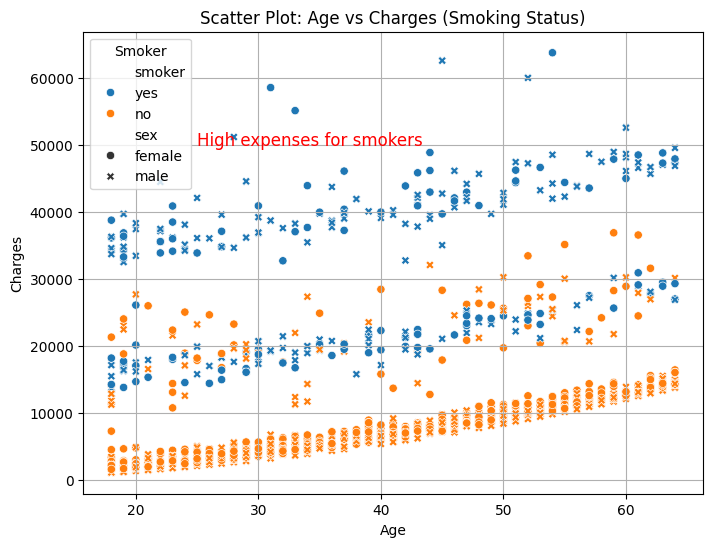

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['smoker'], style=data['sex'])
plt.title("Scatter Plot: Age vs Charges (Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.text(25, 50000, "High expenses for smokers", fontsize=12, color='red')
plt.legend(title='Smoker')
plt.grid(True)
plt.show()

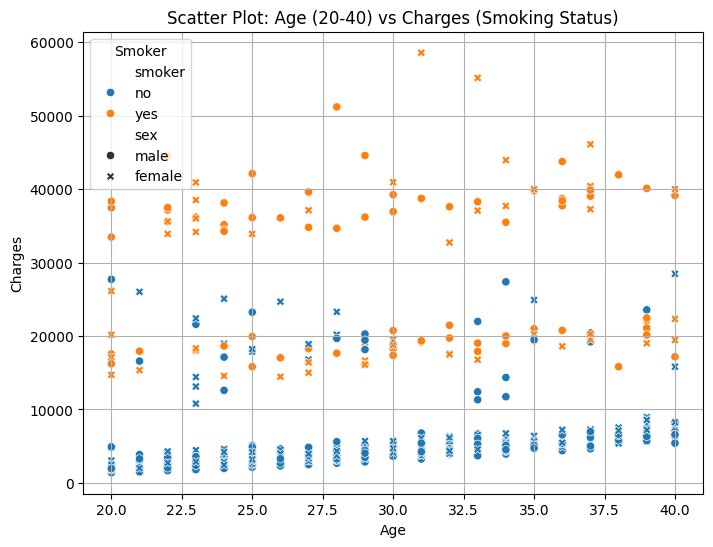

In [21]:
filtered_data = data[(data['age'] >= 20) & (data['age'] <= 40)]

plt.figure(figsize=(8, 6))

# Scatter plot: Age (20-40) vs Smoking
sns.scatterplot(x=filtered_data['age'], y=filtered_data['charges'], hue=filtered_data['smoker'], style=filtered_data['sex'])
plt.title("Scatter Plot: Age (20-40) vs Charges (Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(title='Smoker')
plt.grid(True)
plt.show()

Expenses by Smoking Status:
 smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64


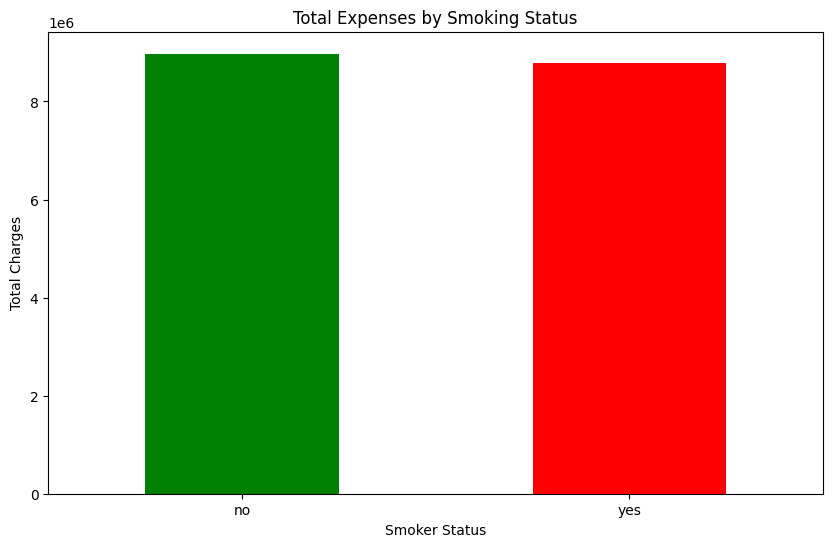

In [22]:
expenses = data.groupby('smoker')['charges'].sum()
print("Expenses by Smoking Status:\n", expenses)

expenses.plot(kind='bar', color=['green', 'red'], figsize=(10, 6))
plt.title("Total Expenses by Smoking Status")
plt.ylabel("Total Charges")
plt.xlabel("Smoker Status")
plt.xticks(rotation=0)
plt.show()

Number of Smokers by Gender:
 sex
female    115
male      159
Name: smoker, dtype: int64


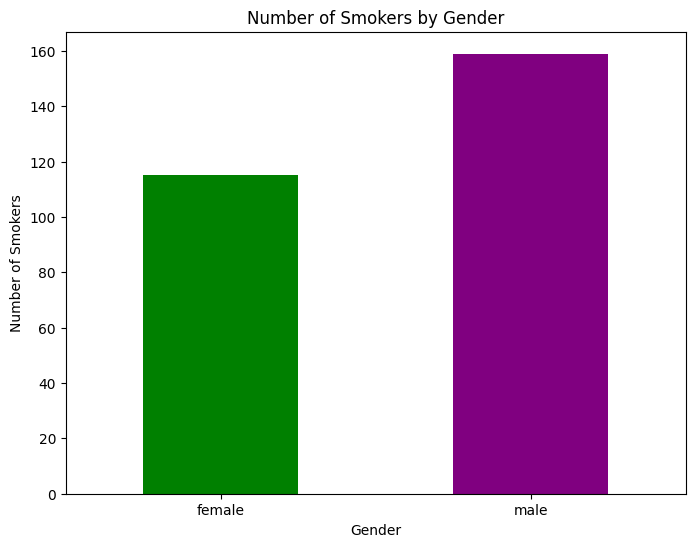

In [23]:
smokers_gender = data[data['smoker'] == 'yes'].groupby('sex')['smoker'].count()
print("Number of Smokers by Gender:\n", smokers_gender)
smokers_gender.plot(kind='bar', color=['green', 'purple'], figsize=(8, 6))
plt.title("Number of Smokers by Gender")
plt.ylabel("Number of Smokers")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

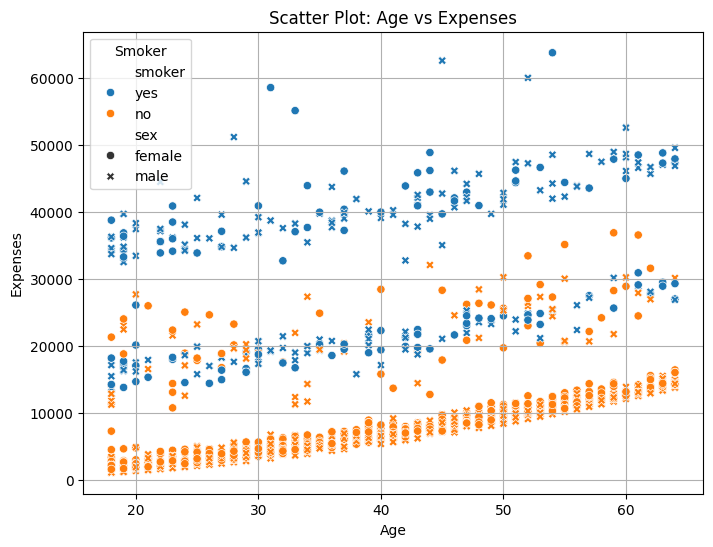

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['smoker'], style=data['sex'])
plt.title("Scatter Plot: Age vs Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend(title='Smoker')
plt.grid(True)
plt.show()

In [30]:
teenage_smokers = data[(data['age'] >= 13) & (data['age'] <= 19) & (data['smoker'] == 'yes')]
num_teenage_smokers = len(teenage_smokers)
print(f"Number of teenage smokers: {num_teenage_smokers}")

Number of teenage smokers: 30
